## Nhlahla Sibiya
## Deep Learning Linear Model
## model :Sequential model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [2]:
#traing set and test set of the house data example
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

## Scale the training and test

In [3]:
#scale the columns
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

Build the model

In [4]:
#Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model

## train the Model

In [8]:
def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   


## Define the plotting function

In [7]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

Epoch 1/30
136/136 [==============================] - 4s 9ms/step - loss: 38382.6172 - root_mean_squared_error: 195.9148 - val_loss: 46441.6992 - val_root_mean_squared_error: 215.5034
Epoch 2/30
136/136 [==============================] - 0s 3ms/step - loss: 21867.4355 - root_mean_squared_error: 147.8764 - val_loss: 26925.2832 - val_root_mean_squared_error: 164.0892
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 11581.8838 - root_mean_squared_error: 107.6192 - val_loss: 14622.7490 - val_root_mean_squared_error: 120.9246
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 7083.4053 - root_mean_squared_error: 84.1630 - val_loss: 9453.6016 - val_root_mean_squared_error: 97.2296
Epoch 5/30
136/136 [==============================] - 0s 3ms/step - loss: 6514.8018 - root_mean_squared_error: 80.7143 - val_loss: 9208.6738 - val_root_mean_squared_error: 95.9618
Epoch 6/30
136/136 [==============================] - 0s 3ms/step - loss: 6514.0640 - ro

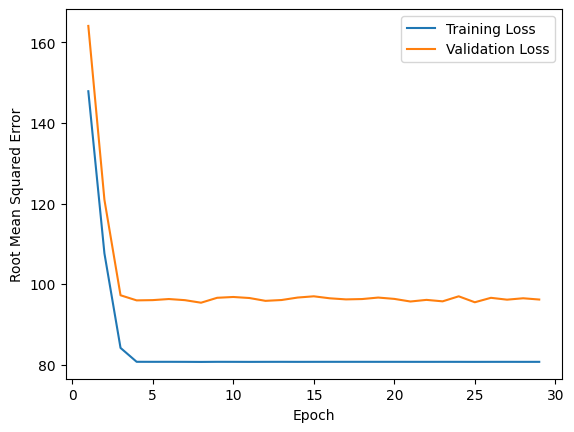

In [9]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

## After shuffling the examples there is a big difference


In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 70
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Shuffle the examples.
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index)) 

# Invoke the functions to build and train the model. Train on the shuffled
# training set.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

Epoch 1/70


C:\Users\Two Ways\Desktop\mlearn\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


136/136 [==============================] - 1s 4ms/step - loss: 42001.7930 - root_mean_squared_error: 204.9434 - val_loss: 30775.4707 - val_root_mean_squared_error: 175.4294
Epoch 2/70
136/136 [==============================] - 0s 3ms/step - loss: 24381.1797 - root_mean_squared_error: 156.1447 - val_loss: 16656.6367 - val_root_mean_squared_error: 129.0606
Epoch 3/70
136/136 [==============================] - 0s 3ms/step - loss: 13100.5283 - root_mean_squared_error: 114.4575 - val_loss: 8807.5850 - val_root_mean_squared_error: 93.8487
Epoch 4/70
136/136 [==============================] - 0s 3ms/step - loss: 7890.8726 - root_mean_squared_error: 88.8306 - val_loss: 6697.4834 - val_root_mean_squared_error: 81.8382
Epoch 5/70
136/136 [==============================] - 0s 3ms/step - loss: 7092.6196 - root_mean_squared_error: 84.2177 - val_loss: 6725.5029 - val_root_mean_squared_error: 82.0092
Epoch 6/70
136/136 [==============================] - 0s 3ms/step - loss: 7093.3408 - root_mean_squar